# King County EDA

In [1]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/weatherford/Documents/Flatiron/Phase_2_Housing_Project/data/kc_house_data.csv")
df.shape
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


All data seems to be coming from 2015 and 2014 so the price of should be more or less normalized. Not too many swings in the housing market in one year as opposed to a house's sale price in say 1950 and a house's sale price in 2010.

In [3]:
df.sort_values(by=['date']).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12076,5437600140,1/10/2015,325000.0,4,2.5,2240,5105,2.0,NO,NONE,...,8 Good,2240,0.0,2002,0.0,98042,47.3922,-122.165,1920,5288
19359,2215450100,1/12/2015,330000.0,4,2.5,2240,7589,2.0,NO,NONE,...,8 Good,2240,0.0,1994,NaN,98030,47.3824,-122.207,2250,7300
2548,4322300340,1/12/2015,265000.0,4,1.5,1740,12728,1.0,NO,NONE,...,7 Average,1180,560.0,1964,0.0,98003,47.2808,-122.300,1830,11125
18398,2523039310,1/12/2015,359000.0,4,2.5,1820,11325,1.0,NaN,NONE,...,8 Good,1390,430.0,1976,0.0,98166,47.4574,-122.361,1990,10802
11086,3816300105,1/12/2015,435000.0,4,2.5,2060,10125,2.0,NO,NONE,...,7 Average,1560,500.0,1979,0.0,98028,47.7640,-122.262,1760,9876


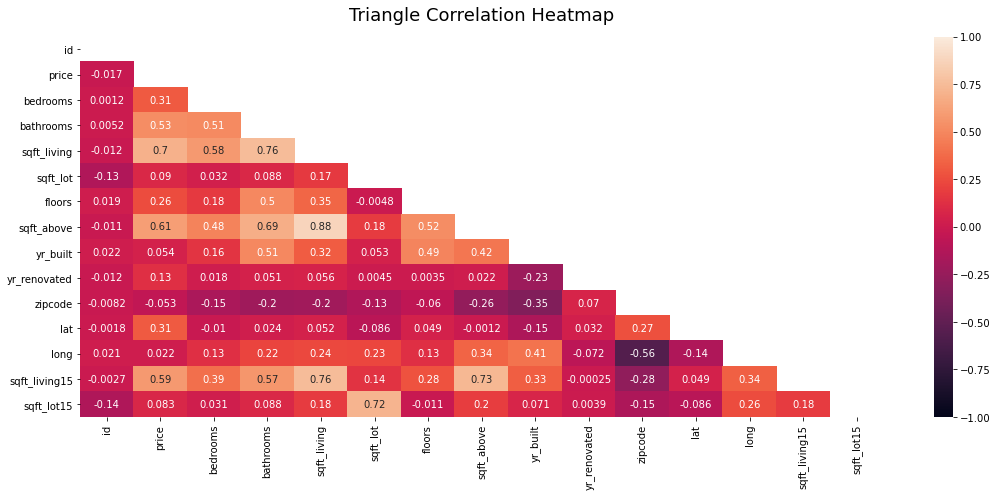

In [4]:
plt.figure(figsize=(18,7))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show();

The features sqft_living15, sqft_above, sqft_living, and bathrooms have the highest correlations with price.





In [5]:
def plot_histogram(df, column, title, xlabel, ylabel):
    # Extract the relevant data
    data = df[column]
    mean = data.mean()
    # Set up plot
    fig, ax = plt.subplots(figsize=(10,7))
    # Plot histogram
    ax.hist(data, bins="auto")
    # Plot vertical line
    ax.axvline(mean, color="black")
    # Customize title and axes labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

540296.5735055795

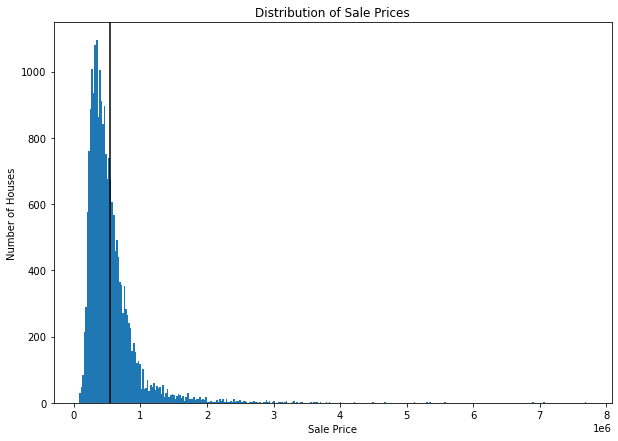

In [6]:
plot_histogram(
    df,
    "price",
    "Distribution of Sale Prices",
    "Sale Price",
    "Number of Houses"
)

df["price"].mean()

Data Cleaning:
    Categorical Counts
    How many NaNs
    Check for uniques

In [7]:
df[["date", "yr_built", "yr_renovated", "waterfront", "view", "condition", "grade", "sqft_basement"]] # a subset of our dataframe with only
# the columns that need cleaning

,date,yr_built,yr_renovated,waterfront,view,condition,grade,sqft_basement
0,10/13/2014,1955,0.0,NaN,NONE,Average,7 Average,0.0
1,12/9/2014,1951,1991.0,NO,NONE,Average,7 Average,400.0
2,2/25/2015,1933,NaN,NO,NONE,Average,6 Low Average,0.0
3,12/9/2014,1965,0.0,NO,NONE,Very Good,7 Average,910.0
4,2/18/2015,1987,0.0,NO,NONE,Average,8 Good,0.0
...,...,...,...,...,...,...,...,...
21592,5/21/2014,2009,0.0,NO,NONE,Average,8 Good,0.0
21593,2/23/2015,2014,0.0,NO,NONE,Average,8 Good,0.0
21594,6/23/2014,2009,0.0,NO,NONE,Average,7 Average,0.0
21595,1/16/2015,2004,0.0,NaN,NONE,Average,8 Good,0.0


In [8]:
type(df['date'])

pandas.core.series.Series

In [9]:
df[["date"]] = df[["date"]].apply(pd.to_datetime)

In [10]:
df['yr_built']

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21592    2009
21593    2014
21594    2009
21595    2004
21596    2008
Name: yr_built, Length: 21597, dtype: int64

In [11]:
df['yr_renovated']

0           0.0
1        1991.0
2           NaN
3           0.0
4           0.0
          ...  
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: yr_renovated, Length: 21597, dtype: float64

In [12]:
df.yr_renovated.fillna(0, inplace= True)

In [13]:
df["yr_built"]

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21592    2009
21593    2014
21594    2009
21595    2004
21596    2008
Name: yr_built, Length: 21597, dtype: int64

In [14]:
renov_yr_clean = np.where(df["yr_renovated"] == 0, df['yr_built'], df["yr_renovated"]) # replacing NaN values with corresponding yr_built value
# in yr_renovated column
df["renov_yr_clean"] = renov_yr_clean

df.renov_yr_clean.isna().sum() # checking to see if there are any NaN values

0

In [15]:
df['yr_built']

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21592    2009
21593    2014
21594    2009
21595    2004
21596    2008
Name: yr_built, Length: 21597, dtype: int64

In [16]:
df["renov_yr_clean"]

0        1955.0
1        1991.0
2        1933.0
3        1965.0
4        1987.0
          ...  
21592    2009.0
21593    2014.0
21594    2009.0
21595    2004.0
21596    2008.0
Name: renov_yr_clean, Length: 21597, dtype: float64

In [17]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renov_yr_clean
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1955.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1991.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,1933.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1965.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2009.0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2014.0
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2009.0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,2004.0


In [18]:
df["sqft_basement"].replace(to_replace= "?", value = 0.0, inplace= True ) # replacing ? with 0.0 in our sqft_basement column

df["sqft_basement"] = df["sqft_basement"].astype("float") #converting sqft_basement to type float

In [19]:
df.waterfront.fillna("NO", inplace= True) #filling in NaN values with NO for waterfront

df.waterfront = df.waterfront.eq('YES').mul(1) # now converting YES and NO to 1 and 0 respectively, this will help with our model fitting later

df.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renov_yr_clean
11177,1774220400,2014-05-13,591000.0,4,2.25,2710,38180,2.0,0,NONE,...,2710,0.0,1977,0.0,98077,47.77,-122.097,2590,38180,1977.0


In [20]:
df.view.unique() # inspecting view column to see if there are any NaN values

df.view.fillna("NONE", inplace = True) #filling in NaN values with string NONE

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21597 non-null  int64         
 1   date            21597 non-null  datetime64[ns]
 2   price           21597 non-null  float64       
 3   bedrooms        21597 non-null  int64         
 4   bathrooms       21597 non-null  float64       
 5   sqft_living     21597 non-null  int64         
 6   sqft_lot        21597 non-null  int64         
 7   floors          21597 non-null  float64       
 8   waterfront      21597 non-null  int64         
 9   view            21597 non-null  object        
 10  condition       21597 non-null  object        
 11  grade           21597 non-null  object        
 12  sqft_above      21597 non-null  int64         
 13  sqft_basement   21597 non-null  float64       
 14  yr_built        21597 non-null  int64         
 15  yr

In [22]:
df["grade"] = df.grade.apply(lambda x: (int(x[0:2])))

In [23]:
df["grade"]

0        7
1        7
2        6
3        7
4        8
        ..
21592    8
21593    8
21594    7
21595    8
21596    7
Name: grade, Length: 21597, dtype: int64

In [24]:
df.view.unique() # inspecting view column to see if there are any NaN values

df.view.fillna("NONE", inplace = True) #filling in NaN values with string NONE

In [25]:
ord_cat_selector = ['view', 'condition', 'grade'] # these three columns all have ordinal data and must be dealt with accordingly

cat_subset = df[ord_cat_selector] # a subset of our dataframe with only ordinal data

cat_subset

,view,condition,grade
0,NONE,Average,7
1,NONE,Average,7
2,NONE,Average,6
3,NONE,Very Good,7
4,NONE,Average,8
...,...,...,...
21592,NONE,Average,8
21593,NONE,Average,8
21594,NONE,Average,7
21595,NONE,Average,8


In [26]:
cat_subset['view'].unique() #inspecting the columns and arranging the values accordingly
cat_subset['condition'].unique()
cat_subset['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [27]:
view_list = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'] # order for each column (least to greatest)
condition_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
grade_list = [3,4,5,6,7,8,9,10,11,12,13]

In [28]:
o_enc = OrdinalEncoder(categories = [view_list, condition_list, grade_list])
o_enc.fit(cat_subset)

OrdinalEncoder(categories=[['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'],
                           ['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                           [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]])

In [29]:
X_subset = pd.DataFrame(o_enc.transform(cat_subset), columns = cat_subset.columns) # create a new ordinal encoded dataframe

#Merge with our original dataframe
transformed_df =df.join(X_subset, rsuffix= "_ord")

# dropping columns redundant columns that were used to derive ordinal columns
transformed_df.drop(columns = ["view", "condition", "grade"], inplace= True)

In [30]:
X_subset

,view,condition,grade
0,0.0,2.0,4.0
1,0.0,2.0,4.0
2,0.0,2.0,3.0
3,0.0,4.0,4.0
4,0.0,2.0,5.0
...,...,...,...
21592,0.0,2.0,5.0
21593,0.0,2.0,5.0
21594,0.0,2.0,4.0
21595,0.0,2.0,5.0


In [31]:
transformed_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renov_yr_clean,view_ord,condition_ord,grade_ord
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,1180,...,0.0,98178,47.5112,-122.257,1340,5650,1955.0,0.0,2.0,4.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,2170,...,1991.0,98125,47.7210,-122.319,1690,7639,1991.0,0.0,2.0,4.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,770,...,0.0,98028,47.7379,-122.233,2720,8062,1933.0,0.0,2.0,3.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,1050,...,0.0,98136,47.5208,-122.393,1360,5000,1965.0,0.0,4.0,4.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,1680,...,0.0,98074,47.6168,-122.045,1800,7503,1987.0,0.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,1530,...,0.0,98103,47.6993,-122.346,1530,1509,2009.0,0.0,2.0,5.0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,2310,...,0.0,98146,47.5107,-122.362,1830,7200,2014.0,0.0,2.0,5.0
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,1020,...,0.0,98144,47.5944,-122.299,1020,2007,2009.0,0.0,2.0,4.0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,1600,...,0.0,98027,47.5345,-122.069,1410,1287,2004.0,0.0,2.0,5.0


In [32]:
transformed_df["age"] = 2015 - transformed_df["yr_built"] 
# adding an age column that gives us the total age of the home

<AxesSubplot:>

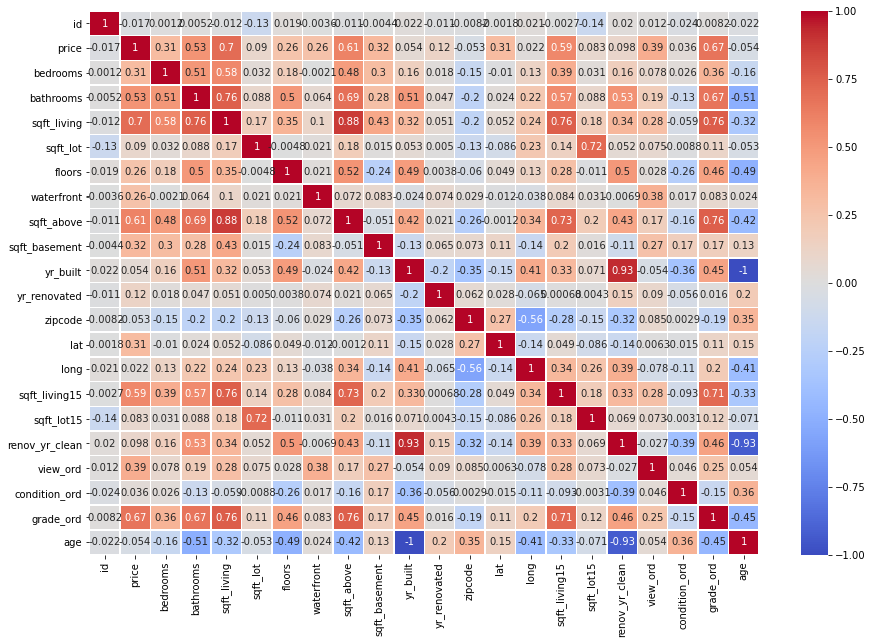

In [33]:
# plotting a heatmap for the correlation of each column to each other

fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(transformed_df.corr(), center = 0, cmap = "coolwarm", annot=True, linewidths=.5, ax=ax)

In [34]:
desired_columns = ['bedrooms', 'bathrooms', 'sqft_living',
'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement',
'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'view_ord',
'condition_ord', 'grade_ord', 'age', "renovated"]

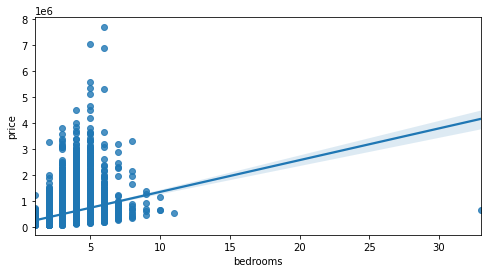

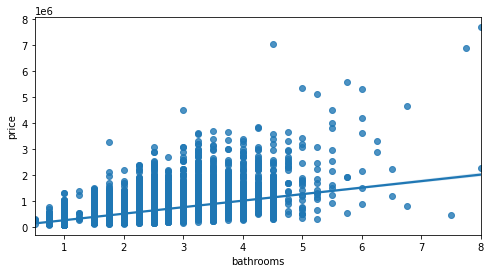

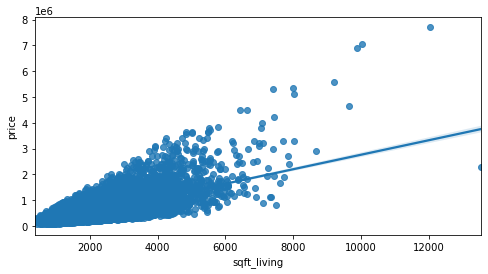

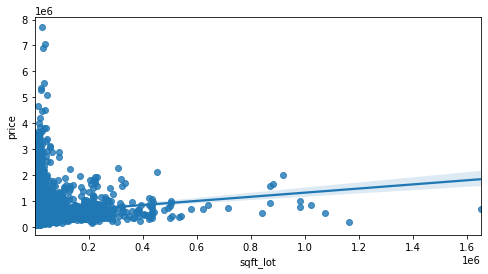

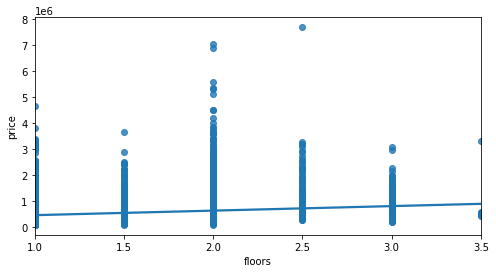

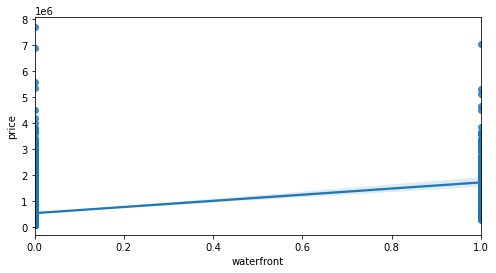

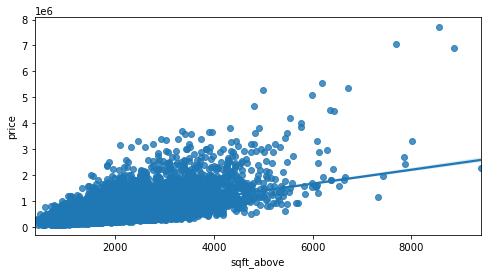

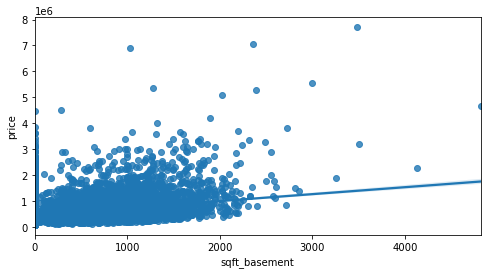

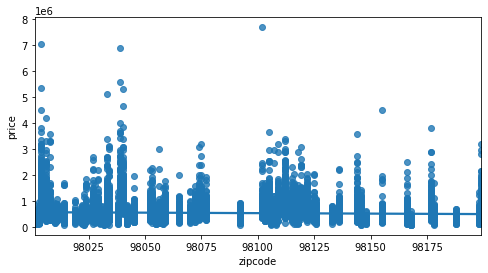

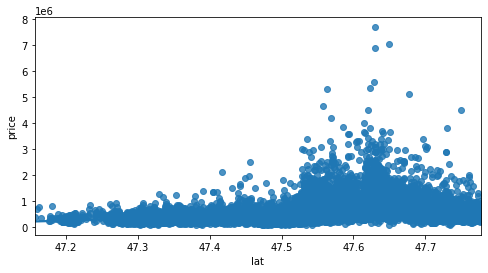

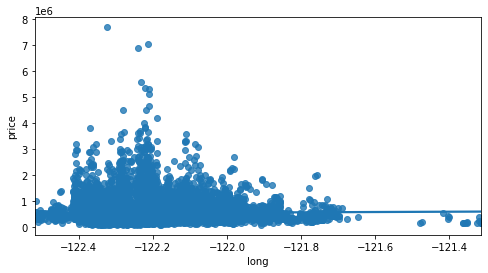

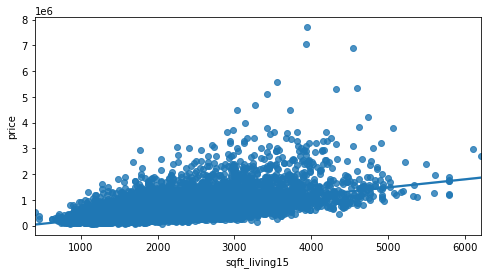

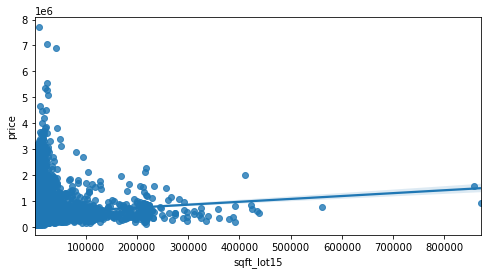

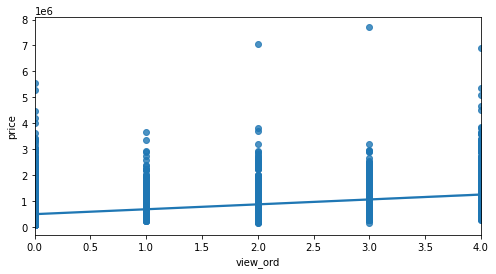

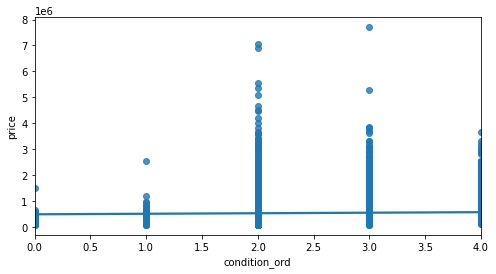

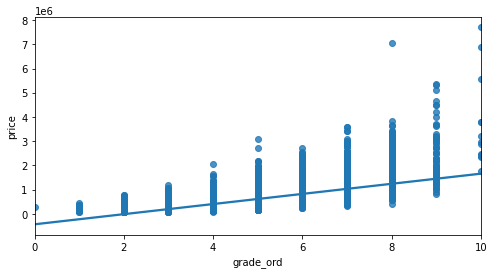

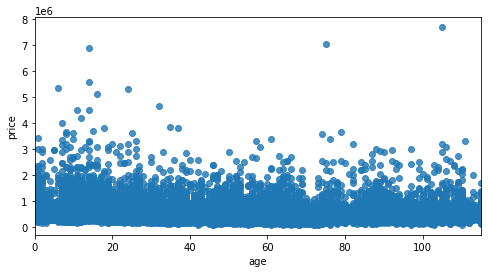

KeyError: 'renovated'

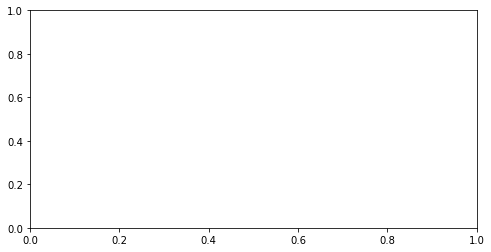

In [35]:
for col in desired_columns :
     fig, ax = plt.subplots(figsize=(8,4))
     sns.regplot(y=transformed_df['price'], x=transformed_df[col])
     plt.show()

# for col in desired_columns:
#     sns.lmplot(data=transformed_df, x = col,  y="price", fit_reg =True)

In [36]:
transformed_df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [37]:
pd.get_dummies(transformed_df['zipcode']).tail()

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
21592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#dropped zipcode == 98001
zipcodes = pd.get_dummies(transformed_df['zipcode'], drop_first = True)
zipcodes.tail()

,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
21592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
from sklearn.preprocessing import OneHotEncoder
onehot_enc = OneHotEncoder(drop = 'first')

In [40]:
zip_array = np.array(transformed_df['zipcode'])
zip_array = zip_array.reshape(-1, 1)

In [41]:
onehot_enc.fit_transform(zip_array)

<21597x69 sparse matrix of type '<class 'numpy.float64'>'
	with 21236 stored elements in Compressed Sparse Row format>

In [42]:
onehot_enc.get_feature_names()

array(['x0_98002', 'x0_98003', 'x0_98004', 'x0_98005', 'x0_98006',
       'x0_98007', 'x0_98008', 'x0_98010', 'x0_98011', 'x0_98014',
       'x0_98019', 'x0_98022', 'x0_98023', 'x0_98024', 'x0_98027',
       'x0_98028', 'x0_98029', 'x0_98030', 'x0_98031', 'x0_98032',
       'x0_98033', 'x0_98034', 'x0_98038', 'x0_98039', 'x0_98040',
       'x0_98042', 'x0_98045', 'x0_98052', 'x0_98053', 'x0_98055',
       'x0_98056', 'x0_98058', 'x0_98059', 'x0_98065', 'x0_98070',
       'x0_98072', 'x0_98074', 'x0_98075', 'x0_98077', 'x0_98092',
       'x0_98102', 'x0_98103', 'x0_98105', 'x0_98106', 'x0_98107',
       'x0_98108', 'x0_98109', 'x0_98112', 'x0_98115', 'x0_98116',
       'x0_98117', 'x0_98118', 'x0_98119', 'x0_98122', 'x0_98125',
       'x0_98126', 'x0_98133', 'x0_98136', 'x0_98144', 'x0_98146',
       'x0_98148', 'x0_98155', 'x0_98166', 'x0_98168', 'x0_98177',
       'x0_98178', 'x0_98188', 'x0_98198', 'x0_98199'], dtype=object)

In [44]:
transformed_df.to_csv('king_county_cleaned.csv')